In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from backtest_functions_v2 import *

In [12]:
df = pd.read_parquet("../data/full_dataset_feature_engineering_v2.parquet")

In [13]:
columns = df.columns.tolist()
for i in range(0, len(columns), 5):
  print(columns[i:i+5])

['news_count', 'tanalysis_absa', 'economy_absa', 'regulation_absa', 'technology_absa']
['adoption_absa', 'cybersecurity_absa', 'return_forward', 'sma_5_20_diff', 'sma_20_50_diff']
['sma_50_200_diff', 'ema_5_20_diff', 'ema_20_50_diff', 'ema_50_200_diff', 'sma_5_20_diff_abs_chg']
['sma_5_20_diff_pct_chg', 'sma_20_50_diff_abs_chg', 'sma_20_50_diff_pct_chg', 'sma_50_200_diff_abs_chg', 'sma_50_200_diff_pct_chg']
['ema_5_20_diff_abs_chg', 'ema_5_20_diff_pct_chg', 'ema_20_50_diff_abs_chg', 'ema_20_50_diff_pct_chg', 'ema_50_200_diff_abs_chg']
['ema_50_200_diff_pct_chg', 'macd_12_26', 'signal_line_9', 'macd_histogram', 'macd_position']
['macd_crossover', 'adx', '+di', '-di', 'adx_slope']
['adx_strength', 'di_crossover', 'di_spread', 'adx_di_composite', 'rsi_7']
['rsi_14', 'rsi_7_slope', 'rsi_7_chg', 'rsi_7_acceleration', 'rsi_14_slope']
['rsi_14_chg', 'rsi_14_acceleration', 'rsi_ratio', 'atr_7', 'atr_14']
['atr_7_slope', 'atr_7_chg', 'atr_14_slope', 'atr_14_chg', 'norm_price_change_7']
['norm_p

Overall Annual Return: 50.05%
Overall Annual Sharpe Ratio: 2.3967
Maximum Drawdown: -13.68 %
Alpha: 0.5299
Beta: -0.0081

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       1.797827    0.244882    -0.016641      1.072431       4.323493
1  2022       0.281376    0.168916    -0.132460      0.155078       1.552257
2  2023       0.218903    0.110743     0.101099      0.099446       1.842868
3  2024       0.161302    0.150896     0.128499      0.041309       1.066480


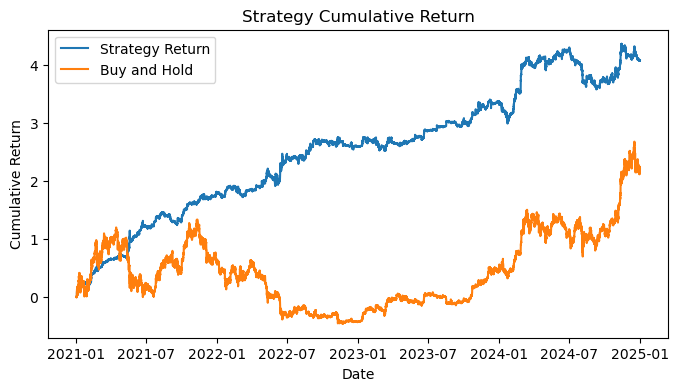

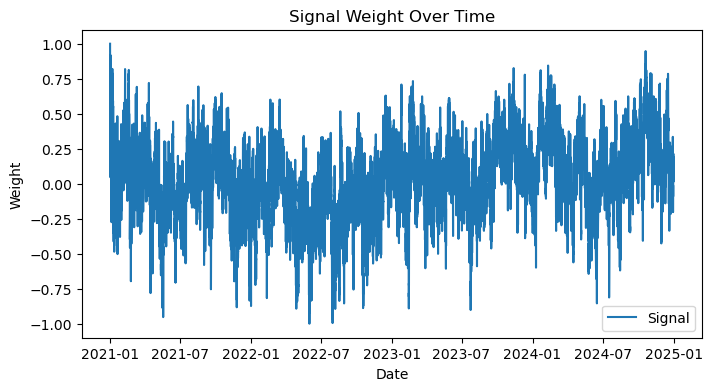

In [14]:
# signal smoothing
df['signal'] = df['tanalysis_absa_ewm_12h']

# signal scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
df['signal'] = scaler.fit_transform(df['signal'].values.reshape(-1, 1))

run_backtest(df, 'h')